# Curve Fitting

We will be using **Stochastic Gradient Descent** to obtain the parameters of best fit to data

In [1]:
import numpy as np                 # Import numpy library
import matplotlib.pyplot as plt    # Import pyplot library
import matplotlib as mpl 


mpl.rcParams['figure.figsize'] = [6.0, 4.0] # Figure Size
mpl.rcParams["legend.frameon"] = True
mpl.rcParams['figure.dpi']=200 # dots per inch

## Polynomial Function
Using the `numpy polynomial` function, we define a polynomial function as shown below with parameters and added noise distribution.

Polynomial function , Eq (1):

$$y(x) = \sum_i \theta_i x^i + \alpha $$

where 
<br>
$\theta_i$ are the parameters of polynomial function
<br>
$\alpha$ is the noise distribution

In [2]:
def polyModelWithNoise(x,theta,sigma):
    '''
    Generating Polynomial Function with given parameters as in Eq (1)
    
    Input:
    x = arrays of x values
    theta = parameters for polynomial function
    sigma = standard deviation of noise distribution added to polynomial function
    
    Output:
    Polynomial function with noise
    
    '''
    y = np.polynomial.polynomial.polyval(x,theta) + np.random.normal(scale=sigma, size=len(x))
        
    return y

## Plot of polynomial

The polynomial function with theta parameters, $\theta=[0,1]$ with $\sigma=0.5$ is plotted.
<br>
Function generated Eq(2):

$$ y(x) = x + \alpha(x)$$

Text(0, 0.5, 'y(x)')

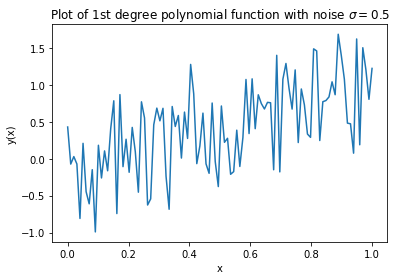

In [3]:
x = np.linspace(0, 1, 100)             # Generate ararys for x values
theta = [0,1]                          # Theta parameters
y = polyModelWithNoise(x, theta, 0.5)  # y value for polynomial with given parameters and sigma=0.5

# Plot
plt.show()
plt.plot(x, y)
plt.title("Plot of 1st degree polynomial function with noise $\sigma = 0.5$") # Plot title
plt.xlabel("x")                                                               # Label x-axes
plt.ylabel("y(x)")                                                            # Label y-axes

## Define Gradient of Polynomial

Using `def` we define gradient of polynomial function with respect to the each parameters theta and output them as array.

For a Polynomial function $y(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +....$, the derivative with respect to each parameters would result as below

Eq (2):

$$ \frac{\partial y}{\partial \theta_0} = x^0$$

$$ \frac{\partial y}{\partial \theta_1} = x^1$$

$$ \frac{\partial y}{\partial \theta_2} = x^2$$
$$.$$
$$.$$
$$.$$

Thus, we can conclude that 

Eq (3):
$$\frac{\partial y}{\partial \theta_i} = x^i$$

In [4]:
def polyGradient(x,theta):
    '''
    Gradient function of Polynomial Eq(3)
    
    Input:
    x = arrays of x values
    theta = parameters of polynomial
    
    Output:
    Gradient function of polynomial with respect to each parameters in array
    
    '''
    p = 0                                   # Set initial value of p
    gradf = []                              # Create an empty array for gradient
    
    # For loop for generating gradient function
    for i in theta:                         
        gradf.append(x**p)
        p += 1
    return gradf

## Stochastic Gradient Descent

Stochastic Gradient Descent works by first estimating the parameters of the polynomial function.
<br>
Then using the polynomial function with estimated parameters, we calculate the estimate of gradient with a small batch of randomly sampled data from the data set.
<br>
As the direction of gradient would be pointing at the maximum increase, we could use the equation below from *Week1_CurveFitting.ipynb* to update a new $\theta$ parameters.

Eq(4)[1]:

$$ \theta_{i+1} = \theta_{i} - \eta_i  \left< \Delta f\right> \frac{\partial f}{\partial \theta} $$

where
<br>
$\theta$ are the parameters
<br>
$\eta_i$ is the learning rate (how big of a step to the next $\theta$ value
<br>
$\left< \Delta f\right>$ average deviation of the fitted polynomial from the true polynomial
<br>
$\frac{\partial f}{\partial \theta}$ is the gradient calculated with randomly sampled data

With the updated $\theta$ parameters, the steps above are repeated multiple times, obtaining new $\theta$ parameters for minimisation of the cost function/$\chi^2$.

For visualization of reduction in $\chi^2$, we define a function to obtain $\chi^2$ over each iteration and plot it out using equation below obtained from *Week1_CurveFitting.ipynb*

Eq(5)[1]:

$$\chi^2 = \left< \Delta f^2\right>$$

### Define a function for the true polynomial & $\chi^2$

In [5]:
def true_f(x):
    '''
    Using the polyModelWithNoise function with set parameters and standard deviation to return the true polynomial function
    
    Input:
    x = arrays of x values
    
    Output:
    Polynomial function with exact parameters for data with added noise
    
    '''
    return polyModelWithNoise(x,[0,1],0.5)


[0.06439966 1.11641987]


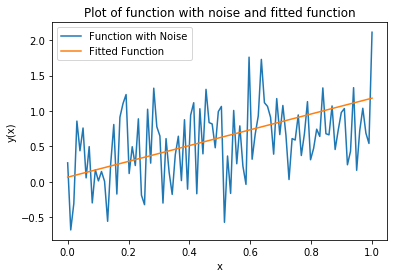

In [6]:
### Gradient Descent ###

# Constants #
theta = [-1, 0.5]        # Set initial parameter guesses   
eta = 0.5                # Set a learning rate
numSteps = 100           # Number of steps for minimisation
chisqArray=[]            # Create empty array for chisq value


# For loop for Gradient Desecent #
for i in range(numSteps):
    xrandom=np.random.rand(10)                                                   # Generate 10 random x values between 0 and 1
    a = polyModelWithNoise(xrandom,theta,0)                                      # Generate corresponding y value for guessed theta
    b = true_f(xrandom)                                                          # Generate corresponsing "true" y value with noise
    deviation = a - b                                                            # Calculate deviation between them
    chisqArray.append(np.average(deviation**2))                                  # Calculating ChiSq Eq(5)
    theta-=eta*np.average(deviation[None,:]*polyGradient(xrandom,theta),axis=1)  # Obtain new parameters using gradient descent method Eq(4)
print(theta)
    
# Plot #
plt.show()
plt.title("Plot of function with noise and fitted function")           # Plot title
plt.plot(x, true_f(x), label='Function with Noise')                    # Plot of "true" function
plt.plot(x, polyModelWithNoise(x, theta, 0), label='Fitted Function')  # plot of fitted function
plt.xlabel("x")                                                        # Label x-axes
plt.ylabel("y(x)")                                                     # Label y-axes
plt.legend(loc='best')                                                 # Label x-axes

Text(0, 0.5, '$\\chi^2$')

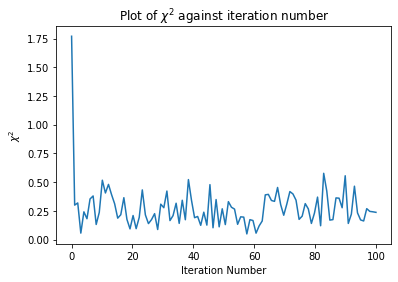

In [7]:
# Chisq progression Plot #
iteration = np.linspace(0, 100, 100)                   # Generate array for iteration number
plt.show()
plt.title("Plot of $\chi^2$ against iteration number") # Plot title
plt.plot(iteration, chisqArray)                        
plt.xlabel("Iteration Number")                         # Label x-axes
plt.ylabel("$\chi^2$")                                 # Label y-axes

It is observed that the value of $\chi^2$ decreases with increasing iterations, implying that the parameters of fitted function gets closer to the true parameters.

## Third Order Polynomial

Next, we will be trying to fit to a **3rd Order Polynomial Function** with $\theta = [0,1,2,2], \sigma = 0.5$ using the codes and defined functions above.

In [8]:
def thirdordertrue_f(x):
    '''
    Using the polyModelWithNoise function with set parameters and standard deviation to return the true polynomial function
    
    Input:
    x = arrays of x values
    
    Output:
    Polynomial function with exact parameters [0,1,2,2] for data with added noise
    '''
    return polyModelWithNoise(x,[0,1,2,2],0.5)

### Curve Fitting with 1st Order

First we will be trying to fit the data with just a 1st order polynomial function.

Text(0, 0.5, 'y(x)')

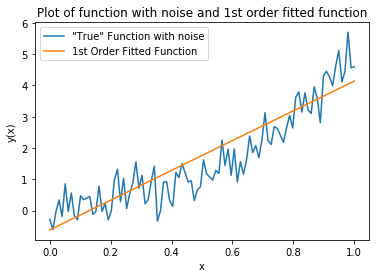

In [9]:
#First Order#

firstordertheta = np.random.uniform(-2, 2, 2)     # Generate random numbers between -2 and 2 for theta parameters
eta = 0.5                                         # Set a learning rate
numSteps = 100                                    # Number of steps for minimization
chisqArrayfirst = []

# For loop of Gradient Descent #
for i in range(numSteps):
    xrandom=np.random.rand(10)                                                                       # Generate 10 random x values between 0 and 1
    a = polyModelWithNoise(xrandom,firstordertheta,0)                                                # Generate corresponding y value for guessed theta
    b = thirdordertrue_f(xrandom)                                                                    # Generate corresponsing "true" y value with noise
    deviation = a - b                                                                                # Calculate deviation between them
    chisqArrayfirst.append(np.average(deviation**2))                                                 # Calculating ChiSq Eq(5)
    firstordertheta-=eta*np.average(deviation[None,:]*polyGradient(xrandom,firstordertheta),axis=1)  # Obtain new parameters using gradient descent method Eq(4)

plt.show()
plt.title("Plot of function with noise and 1st order fitted function")                    # Plot title
plt.plot(x, thirdordertrue_f(x), label='"True" Function with noise')                      # Plot of 'true' function
plt.plot(x, polyModelWithNoise(x, firstordertheta, 0), label='1st Order Fitted Function') # Plot of fitted function
plt.legend(loc='best')                                                                    # Show legend
plt.xlabel('x')                                                                           # Label x-axes
plt.ylabel('y(x)')                                                                        # Label x-axes



Text(0, 0.5, '$\\chi^2$')

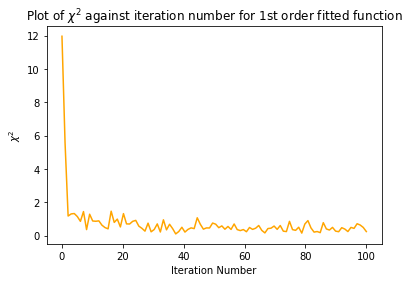

In [10]:
# Chisq progression Plot #
iteration = np.linspace(0, 100, 100)                   # Generate array for iteration number
plt.show()
plt.title("Plot of $\chi^2$ against iteration number for 1st order fitted function") # Plot title
plt.plot(iteration, chisqArrayfirst, color='orange')                        
plt.xlabel("Iteration Number")                         # Label x-axes
plt.ylabel("$\chi^2$")                                 # Label y-axes

### Curve Fitting with 3rd Order

Next we will be trying to fit the data with a 3st order polynomial function.

Text(0, 0.5, 'y(x)')

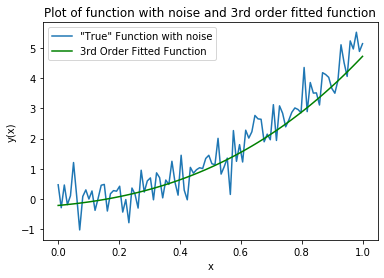

In [11]:
#Third Order#

thirdordertheta = np.random.uniform(-2, 2, 4)     # Generate random numbers between -2 and 2 for theta parameters
eta = 0.5                                         # Set a learning rate
numSteps = 100                                    # Number of steps for minimization
chisqArraythird = []

# For loop of Gradient Descent #
for i in range(numSteps):
    xrandom=np.random.rand(10)                                                                       # Generate 10 random x values between 0 and 1
    a = polyModelWithNoise(xrandom,thirdordertheta,0)                                                # Generate corresponding y value for guessed theta
    b = thirdordertrue_f(xrandom)                                                                    # Generate corresponsing "true" y value with noise
    deviation = a - b                                                                                # Calculate deviation between them
    chisqArraythird.append(np.average(deviation**2))                                                 # Calculating ChiSq Eq(5)
    thirdordertheta-=eta*np.average(deviation[None,:]*polyGradient(xrandom,thirdordertheta),axis=1)  # Obtain new parameters using gradient descent method Eq(4)

plt.show()
plt.title("Plot of function with noise and 3rd order fitted function")                    # Plot title
plt.plot(x, thirdordertrue_f(x), label='"True" Function with noise')                      # Plot of 'true' function
plt.plot(x, polyModelWithNoise(x, thirdordertheta, 0), label='3rd Order Fitted Function', color='green') # Plot of fitted function
plt.legend(loc='best')                                                                    # Show legend
plt.xlabel('x')                                                                           # Label x-axes
plt.ylabel('y(x)')                                                                        # Label x-axes

Text(0, 0.5, '$\\chi^2$')

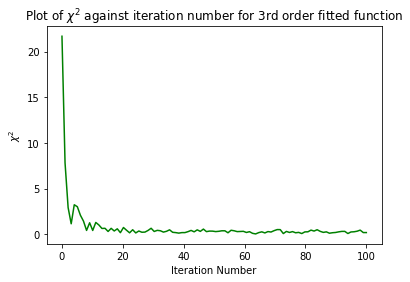

In [12]:
# Chisq progression Plot #
iteration = np.linspace(0, 100, 100)                   # Generate array for iteration number
plt.show()
plt.title("Plot of $\chi^2$ against iteration number for 3rd order fitted function") # Plot title
plt.plot(iteration, chisqArraythird, color='green')                        
plt.xlabel("Iteration Number")                         # Label x-axes
plt.ylabel("$\chi^2$")                                 # Label y-axes

### Curve Fitting with 7th Order

Next we will be trying to fit the data with a 7th order polynomial function.

Text(0, 0.5, 'y(x)')

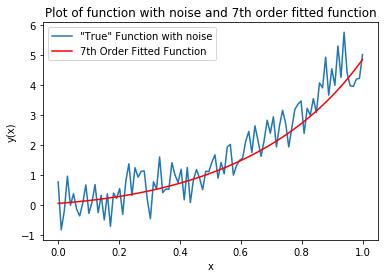

In [13]:
#Seventh Order#

seventhordertheta = np.random.uniform(-2, 2, 8)     # Generate random numbers between -2 and 2 for theta parameters
eta = 0.5                                         # Set a learning rate
numSteps = 100                                    # Number of steps for minimization
chisqArrayseventh = []

# For loop of Gradient Descent #
for i in range(numSteps):
    xrandom=np.random.rand(10)                                                                           # Generate 10 random x values between 0 and 1
    a = polyModelWithNoise(xrandom,seventhordertheta,0)                                                  # Generate corresponding y value for guessed theta
    b = thirdordertrue_f(xrandom)                                                                      # Generate corresponsing "true" y value with noise
    deviation = a - b                                                                                    # Calculate deviation between them
    chisqArrayseventh.append(np.average(deviation**2))                                                   # Calculating ChiSq Eq(5)
    seventhordertheta-=eta*np.average(deviation[None,:]*polyGradient(xrandom,seventhordertheta),axis=1)  # Obtain new parameters using gradient descent method Eq(4)

plt.show()
plt.title("Plot of function with noise and 7th order fitted function")                      # Plot title
plt.plot(x, thirdordertrue_f(x), label='"True" Function with noise')                        # Plot of 'true' function
plt.plot(x, polyModelWithNoise(x, seventhordertheta, 0), label='7th Order Fitted Function', color='red') # Plot of fitted function
plt.legend(loc='best')                                                                      # Show legend
plt.xlabel('x')                                                                             # Label x-axes
plt.ylabel('y(x)')                                                                          # Label x-axes

Text(0, 0.5, '$\\chi^2$')

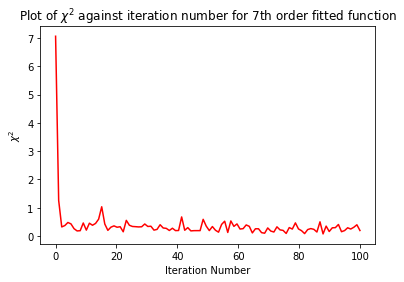

In [14]:
# Chisq progression Plot #
iteration = np.linspace(0, 100, 100)                   # Generate array for iteration number
plt.show()
plt.title("Plot of $\chi^2$ against iteration number for 7th order fitted function") # Plot title
plt.plot(iteration, chisqArrayseventh, color='red')                        
plt.xlabel("Iteration Number")                         # Label x-axes
plt.ylabel("$\chi^2$")                                 # Label y-axes

## Plot over -0.5 to 1.5

To test the how well the best fit models are, we try to plot the true polynomial and fitted polynomials function across a range of x from -0.5 to 1.5

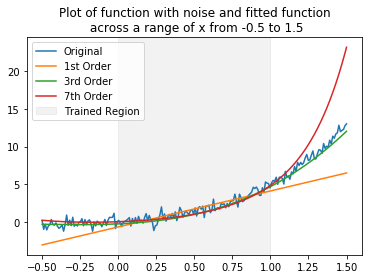

In [15]:
x = np.linspace(-0.5, 1.5, 200)
plt.title("Plot of function with noise and fitted function\n across a range of x from -0.5 to 1.5")
plt.axvspan(0, 1, color='grey', alpha=0.1, label='Trained Region')
plt.plot(x, thirdordertrue_f(x), label='Original')
plt.plot(x, polyModelWithNoise(x, firstordertheta, 0), label='1st Order')
plt.plot(x, polyModelWithNoise(x, thirdordertheta, 0), label='3rd Order')
plt.plot(x, polyModelWithNoise(x, seventhordertheta, 0), label='7th Order')
plt.legend(loc='best')

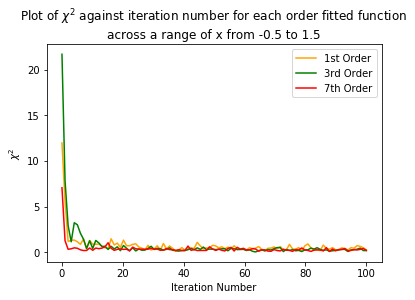

In [16]:
# Chisq progression Plot #
iteration = np.linspace(0, 100, 100)                   # Generate array for iteration number
plt.show()
plt.title("Plot of $\chi^2$ against iteration number for each order fitted function \nacross a range of x from -0.5 to 1.5") # Plot title
plt.plot(iteration, chisqArrayfirst, label='1st Order', color='orange') 
plt.plot(iteration, chisqArraythird, label='3rd Order', color='green') 
plt.plot(iteration, chisqArrayseventh, label='7th Order', color='red')                        
plt.xlabel("Iteration Number")                         # Label x-axes
plt.ylabel("$\chi^2$")                                 # Label y-axes
plt.legend(loc='best')

# Discussion

We will now conclude which model fit is the best using the function plots and $\chi^2$ plot.


**1st Order:**
<br>
The 1st order fitted polynomial function does a bad job at fitting the data within and outside of it's trained range as there is not enough parameters. It's $\chi^2$ value is also relatively high compare to other models

**3rd Order:**
<br>
The 3rd order fitted polynomial function does a good job at fitting the data within and outside of it's trained range. This is expected as the number of parameter is the same to the 'true' function. It's $\chi^2$ value is relatively low compare to 1st order polynomial fit.

**7th Order:**
<br>
The 7th order fitted polynomial function does a good job at fitting the data within it's trained range but does a poor job outside of the range. It does not fit the data and sometimes there are extra inflection points. Although it's $\chi^2$ value is still relatively low, but there are too many parameters in the fitted function which causes it to does a poor job at generalising outside of it's trained range.

# Conclusion

The 3rd Order polynomial function is the best fit model whereas the 1st order polynomial function is the worst fit.

# Reference
[1] Nichol, R. 2020. *"Week1_CurveFitting.ipynb"* .[Online] UCL Moodle resource. Available from https://colab.research.google.com/github/nichol77/mlForPhysicists/blob/master/Week1/Week1_CurveFitting.ipynb [accessed 13th October 2021]
